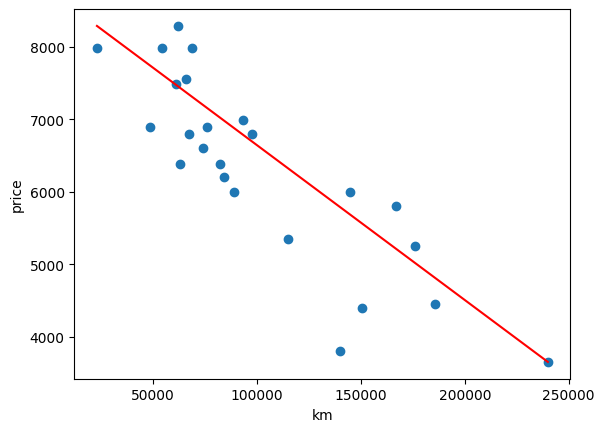

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

km = [240000.0, 139800.0, 150500.0, 185530.0, 176000.0, 114800.0, 166800.0, 89000.0, 144500.0, 84000.0, 82029.0, 63060.0, 74000.0, 97500.0, 67000.0, 76025.0, 48235.0, 93000.0, 60949.0, 65674.0, 54000.0, 68500.0, 22899.0, 61789.0]
price = [3650.0, 3800.0, 4400.0, 4450.0, 5250.0, 5350.0, 5800.0, 5990.0, 5999.0, 6200.0, 6390.0, 6390.0, 6600.0, 6800.0, 6800.0, 6900.0, 6900.0, 6990.0, 7490.0, 7555.0, 7990.0, 7990.0, 7990.0, 8290.0]

def plot_data():
    plt.scatter(km, price)
    plt.xlabel("km")
    plt.ylabel("price")
plot_data()
# plt.plot([max(km), min(km)], [min(price), max(price)], color='r')
# plt.show()
plt.plot([max(km), min(km)], [min(price), max(price)], color='r')
plt.show()
